### 本案例数据源：[搜狐新闻数据(SogouCS)](http://www.sogou.com/labs/resource/cs.php)

文本、语义分析常用库有：word2vec、Gensim

相似度算法：余弦相似度

In [1]:
import pandas as pd
import jieba

In [2]:
df_news = pd.read_csv('data/news.csv', encoding='utf-8')
df_news = df_news.dropna()
df_news.head()

,url,docno,title,content
0,http://sports.sohu.com/20070422/n249599819.shtml,0be9f205fcdf9e72,鲍威尔:中国队表现出乎意料 短距离配合很出色,"新华网武汉4月21日电(记者郑道锦 李鹏翔)在2:3输给中国女足(中国女足新闻,中国女足说吧..."
1,http://sports.sohu.com/20070422/n249599820.shtml,04f53205fcdf9e72,英超-孙继海轻伤不下火线 曼城1-1惜平沃特福德,"搜狐体育讯 北京时间4月21日晚22点,在英超联赛第35轮的一场比赛中,曼城客场迎战联赛倒数..."
2,http://sports.sohu.com/20070422/n249599822.shtml,02636525fcdf9e72,亚冠定律首度失灵 图拨炮轰洋裁判左右比赛进程,"搜狐体育讯 北京时间4月21日济南消息 同长春亚泰比赛之前,本赛季的山东鲁能一直存在一种神奇..."
3,http://sports.sohu.com/20070422/n249599831.shtml,0b3447c5fcdf9e72,搜狐-丁俊晖有约4:实话实说我的竞技状态一般,"搜狐体育讯 作为丁俊晖(丁俊晖博客,丁俊晖说吧)全球官方网站以及个人官方博客的承建商,搜狐在..."
4,http://sports.sohu.com/20070422/n249599835.shtml,0c16ae85fcdf9e72,英超-伟大战役查尔顿1-1谢联 郑智未闪耀生死战,"搜狐体育讯 北京时间4月21日22:00,在英超联赛第35轮的一场焦点战役中,查尔顿在山谷球..."


In [3]:
df_news.shape

(953, 4)

In [4]:
content = df_news.content.values.tolist()
content[952]

'搜狐体育讯 北京时间4月22日晚,荷甲联赛第33轮全面开打,领头羊埃因霍温在客场1-1被实力有限的乌特勒支逼平。与此同时,阿贾克斯以5-2的大比分击败了鹿特丹斯巴达,阿尔克马尔也以3-1战胜了海伦芬,这样3支球队同积72分,阿尔克马尔净胜球最多排在第一,阿贾克斯次之,埃因霍温被挤到了第三。 联赛只剩下最后一轮,埃因霍温就算在主场战胜维特斯,能否夺冠,也得看别人脸色,只要另外两队有一支队伍获胜,联赛冠军就将拱手相让。客观的说,埃因霍温夺取联赛冠军的希望已经变得渺茫。 中国球员孙祥本场比赛没能进入球队的18人比赛大名单,这也是孙祥自从2月18日代表球队首次亮相荷甲赛场以来,第一次未能进入球队的比赛大名单。此前的三轮比赛,尽管孙祥也未能出场,但是都进入18人比赛名单。在埃因霍温夺冠前景变得几近渺茫的同时,孙祥在埃因霍温的处境也进入最低谷。 在上一轮主场2-0战胜特温特的比赛后,主教练科曼在接受媒体采访,被问及孙祥下赛季去留问题的时候,他曾经肯定的表示,“本赛季如果埃因霍温能夺冠,孙祥就会留下。”可是1-1客场被乌特勒支逼平后,埃因霍温的领先优势荡然无存,而且埃因霍温现在比排名第一阿尔克马尔少了7个净胜球,要想在最后一轮追回来,谈何容易。埃因霍温如果夺冠,孙祥就会留下来,那么埃因霍温如果不能夺冠呢?孙祥下个赛季将何去何从。回顾最近一个月埃因霍温的比赛,孙祥代表球队出场的机会屈指可数,除了冠军杯的两次替补出场,荷甲联赛竟然没有得到一次出场机会,这场比赛更是连18人大名单都没进入。孙祥在埃因霍温的前景实在不容乐观。 从2月18日首次代表球队荷甲亮相就以首发的身份登场,到冠军联赛客场对阿森纳的首发打满全场,并制造关键的前场任意球,再到荷甲联赛的连续三轮首发,孙祥在埃因霍温的“蜜月期”来得很早也很“甜蜜”。但是一次比赛中膝盖的受伤让孙祥的状态受到很大的影响,连科曼都对其下滑的状态颇有微辞。在后防线最缺兵少将的时候,科曼无奈只好启用“千年板凳”阿多,而这位近几个赛季出场次数都寥寥无几的加纳边缘国脚,很好的把握住了机会,迅速占据了后防线上的一个主力位置,近几轮比赛场场首发,孙祥只能在替补席上与同样状态低迷的葡萄牙国脚达·科斯塔一起等待机会。 此前三轮联赛,尽管都未能出场,但是孙祥至少还是被召入了18人的比赛大名单。本轮联赛前,埃因霍温后防大将阿莱士的伤愈,将原先首发阵容里的阿尔西德斯

### 分词：使用结巴分词器

In [5]:
content_S = []
for line in content:
    content_segment = jieba.lcut(line)
    if len(content_segment) > 1 and content_segment != '\r\n':
        content_S.append(content_segment)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\cj_zuo\AppData\Local\Temp\jieba.cache
Loading model cost 0.734 seconds.
Prefix dict has been built succesfully.


In [6]:
content_S[952]

['搜狐',
 '体育讯',
 ' ',
 '北京',
 '时间',
 '4',
 '月',
 '22',
 '日晚',
 ',',
 '荷甲',
 '联赛',
 '第',
 '33',
 '轮',
 '全面',
 '开打',
 ',',
 '领头羊',
 '埃因霍温',
 '在',
 '客场',
 '1',
 '-',
 '1',
 '被',
 '实力',
 '有限',
 '的',
 '乌',
 '特勒',
 '支逼平',
 '。',
 '与此同时',
 ',',
 '阿贾克斯',
 '以',
 '5',
 '-',
 '2',
 '的',
 '大比分',
 '击败',
 '了',
 '鹿特丹',
 '斯巴达',
 ',',
 '阿尔克',
 '马尔',
 '也',
 '以',
 '3',
 '-',
 '1',
 '战胜',
 '了',
 '海伦',
 '芬',
 ',',
 '这样',
 '3',
 '支',
 '球队',
 '同积',
 '72',
 '分',
 ',',
 '阿尔克',
 '马尔',
 '净胜球',
 '最',
 '多排',
 '在',
 '第一',
 ',',
 '阿贾克斯',
 '次之',
 ',',
 '埃因霍温',
 '被',
 '挤',
 '到',
 '了',
 '第三',
 '。',
 ' ',
 '联赛',
 '只',
 '剩下',
 '最后',
 '一轮',
 ',',
 '埃因霍温',
 '就算',
 '在',
 '主场',
 '战胜',
 '维特',
 '斯',
 ',',
 '能否',
 '夺冠',
 ',',
 '也',
 '得',
 '看',
 '别人',
 '脸色',
 ',',
 '只要',
 '另外',
 '两队',
 '有',
 '一支',
 '队伍',
 '获胜',
 ',',
 '联赛',
 '冠军',
 '就',
 '将',
 '拱手相让',
 '。',
 '客观',
 '的',
 '说',
 ',',
 '埃因霍温',
 '夺取',
 '联赛',
 '冠军',
 '的',
 '希望',
 '已经',
 '变得',
 '渺茫',
 '。',
 ' ',
 '中国',
 '球员',
 '孙祥',
 '本场',
 '比赛',
 '没',
 '能',
 '进入',
 '球队',
 '的',
 '18',
 

In [7]:
df_content = pd.DataFrame({'content_S':content_S})
df_content.tail()

,content_S
948,"[搜狐, 体育讯, , 北京, 时间, 4, 月, 22, 日晚, ,, 2007, 年,..."
949,"[来源, :, 搜狐, 体育, , 搜狐, 体育讯, , 北京, 时间, 4, 月, 2..."
950,"[来源, :, 搜狐, 体育, , 搜狐, 体育讯, , 北京, 时间, 4, 月, 2..."
951,"[来源, :, 搜狐, 体育, , 搜狐, 体育讯, , 丁俊晖, 终于, 慢慢, 适应..."
952,"[搜狐, 体育讯, , 北京, 时间, 4, 月, 22, 日晚, ,, 荷甲, 联赛, ..."


In [8]:
stopwords = pd.read_csv('data/stopwords.txt', index_col=False, sep='\t', quoting=3, names=['stopword'], encoding='utf-8')
stopwords.head(10)

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [9]:
def drop_stopwords(contents, stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean, all_words

contents = df_content.content_S.values.tolist()
stopwords = stopwords.stopword.values.tolist()
contents_clean, all_words = drop_stopwords(contents, stopwords)

In [10]:
print(len(contents_clean))
print(len(all_words))

953
211715


In [11]:
df_content = pd.DataFrame({'contents_clean':contents_clean})
df_content.head()

,contents_clean
0,"[新华网, 武汉, 月, 21, 日电, 记者, 郑道, 锦, , 李鹏, 翔, 输给, ..."
1,"[搜狐, 体育讯, , 北京, 时间, 月, 21, 日晚, 22, 点, 英超, 联赛,..."
2,"[搜狐, 体育讯, , 北京, 时间, 月, 21, 日, 济南, 消息, , 长春亚泰..."
3,"[搜狐, 体育讯, , 丁俊晖, 丁俊晖, 博客, 丁俊晖, 说, 全球, 官方网站, 官..."
4,"[搜狐, 体育讯, , 北京, 时间, 月, 21, 日, 22, 00, 英超, 联赛,..."


In [12]:
df_all_words = pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,新华网
1,武汉
2,月
3,21
4,日电


In [13]:
import numpy as np

In [14]:
words_count = df_all_words.groupby(by=['all_words'])['all_words'].agg({'count':np.size})
words_count = words_count.reset_index().sort_values(by=['count'], ascending=False)
words_count.head(20)

d:\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,all_words,count
0,,18081
13223,比赛,3171
11144,搜狐,1904
2178,中,1836
17840,说,1718
4442,分,1271
13980,火箭,1126
7824,姚明,987
11710,新闻,966
18028,责任编辑,941


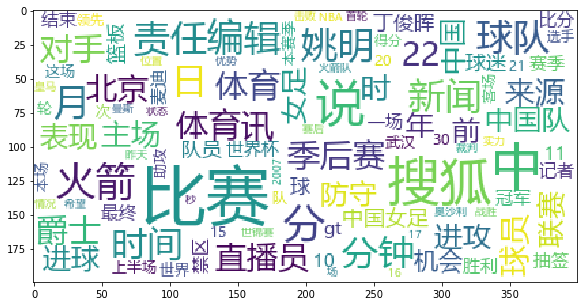

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud = WordCloud(font_path='C:\Windows\Fonts\msyh.ttc', background_color='white', max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

### TF-IDF：提取关键字

In [29]:
import jieba.analyse

index = 952
print(df_news['content'][index])
content_S_str = "".join(content_S[index])
print("  ".join(jieba.analyse.extract_tags(content_S_str, topK=10 if len(content_S_str) < 1000 else int(len(content_S_str) / 100), withWeight=False)))

搜狐体育讯 北京时间4月22日晚,荷甲联赛第33轮全面开打,领头羊埃因霍温在客场1-1被实力有限的乌特勒支逼平。与此同时,阿贾克斯以5-2的大比分击败了鹿特丹斯巴达,阿尔克马尔也以3-1战胜了海伦芬,这样3支球队同积72分,阿尔克马尔净胜球最多排在第一,阿贾克斯次之,埃因霍温被挤到了第三。 联赛只剩下最后一轮,埃因霍温就算在主场战胜维特斯,能否夺冠,也得看别人脸色,只要另外两队有一支队伍获胜,联赛冠军就将拱手相让。客观的说,埃因霍温夺取联赛冠军的希望已经变得渺茫。 中国球员孙祥本场比赛没能进入球队的18人比赛大名单,这也是孙祥自从2月18日代表球队首次亮相荷甲赛场以来,第一次未能进入球队的比赛大名单。此前的三轮比赛,尽管孙祥也未能出场,但是都进入18人比赛名单。在埃因霍温夺冠前景变得几近渺茫的同时,孙祥在埃因霍温的处境也进入最低谷。 在上一轮主场2-0战胜特温特的比赛后,主教练科曼在接受媒体采访,被问及孙祥下赛季去留问题的时候,他曾经肯定的表示,“本赛季如果埃因霍温能夺冠,孙祥就会留下。”可是1-1客场被乌特勒支逼平后,埃因霍温的领先优势荡然无存,而且埃因霍温现在比排名第一阿尔克马尔少了7个净胜球,要想在最后一轮追回来,谈何容易。埃因霍温如果夺冠,孙祥就会留下来,那么埃因霍温如果不能夺冠呢?孙祥下个赛季将何去何从。回顾最近一个月埃因霍温的比赛,孙祥代表球队出场的机会屈指可数,除了冠军杯的两次替补出场,荷甲联赛竟然没有得到一次出场机会,这场比赛更是连18人大名单都没进入。孙祥在埃因霍温的前景实在不容乐观。 从2月18日首次代表球队荷甲亮相就以首发的身份登场,到冠军联赛客场对阿森纳的首发打满全场,并制造关键的前场任意球,再到荷甲联赛的连续三轮首发,孙祥在埃因霍温的“蜜月期”来得很早也很“甜蜜”。但是一次比赛中膝盖的受伤让孙祥的状态受到很大的影响,连科曼都对其下滑的状态颇有微辞。在后防线最缺兵少将的时候,科曼无奈只好启用“千年板凳”阿多,而这位近几个赛季出场次数都寥寥无几的加纳边缘国脚,很好的把握住了机会,迅速占据了后防线上的一个主力位置,近几轮比赛场场首发,孙祥只能在替补席上与同样状态低迷的葡萄牙国脚达·科斯塔一起等待机会。 此前三轮联赛,尽管都未能出场,但是孙祥至少还是被召入了18人的比赛大名单。本轮联赛前,埃因霍温后防大将阿莱士的伤愈,将原先首发阵容里的阿尔西德斯挤

### LDA：主题模型  
格式要求： list to list形式，分词号的整个语料

In [30]:
from gensim import corpora, models, similarities
import gensim

d:\python\python36\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [31]:
# 做映射，相当于词袋
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]

In [35]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20) #类似Kmeans自己制定K值

In [39]:
# 一号分类结果
print(lda.print_topic(1, topn=20))
print(len(lda.print_topic(1)))

0.013*" " + 0.009*"比赛" + 0.006*"分钟" + 0.005*"中" + 0.004*"球队" + 0.003*"说" + 0.003*"对手" + 0.002*"联赛" + 0.002*"球员" + 0.002*"冠军" + 0.002*"开出" + 0.002*"路" + 0.002*"曼斯" + 0.002*"进攻" + 0.002*"火箭队" + 0.002*"队员" + 0.002*"组合" + 0.002*"时" + 0.002*"国际米兰" + 0.002*"机会"
124


In [42]:
for topic in lda.print_topics(num_topics=20, num_words=5):
    print(topic[1])

0.029*" " + 0.015*"比赛" + 0.010*"说" + 0.006*"中" + 0.006*"球队"
0.013*" " + 0.009*"比赛" + 0.006*"分钟" + 0.005*"中" + 0.004*"球队"
0.071*" " + 0.015*"比赛" + 0.008*"中" + 0.008*"说" + 0.008*"丁俊晖"
0.067*" " + 0.013*"比赛" + 0.009*"分" + 0.008*"中" + 0.007*"搜狐"
0.018*" " + 0.006*"比赛" + 0.005*"女足" + 0.005*"分" + 0.004*"球队"
0.022*" " + 0.005*"比赛" + 0.004*"分" + 0.004*"搜狐" + 0.003*"说"
0.035*" " + 0.029*"比赛" + 0.012*"中" + 0.007*"分钟" + 0.007*"球队"
0.034*" " + 0.007*"比赛" + 0.006*"说" + 0.006*"搜狐" + 0.006*"分钟"
0.059*" " + 0.016*"比赛" + 0.009*"说" + 0.008*"搜狐" + 0.006*"中"
0.019*" " + 0.008*"分钟" + 0.006*"比赛" + 0.005*"球员" + 0.004*"新闻"
0.054*" " + 0.016*"比赛" + 0.007*"说" + 0.006*"中" + 0.006*"搜狐"
0.054*" " + 0.012*"比赛" + 0.009*"说" + 0.007*"中" + 0.005*"搜狐"
0.151*" " + 0.015*"搜狐" + 0.012*"比赛" + 0.010*"中" + 0.008*"火箭"
0.043*" " + 0.019*"比赛" + 0.011*"中" + 0.007*"说" + 0.007*"分"
0.027*" " + 0.015*"比赛" + 0.012*"分钟" + 0.006*"说" + 0.006*"中"
0.036*" " + 0.015*"比赛" + 0.006*"分钟" + 0.006*"中国女足" + 0.005*"说"
0.028*" " + 0.012*"比赛" + 0.009

In [61]:
category = []
for i in range(len(contents_clean)):
    category.append('体育')
df_train = pd.DataFrame({'contents_clean':contents_clean, 'label':category})
df_train.head()

,contents_clean,label
0,"[新华网, 武汉, 月, 21, 日电, 记者, 郑道, 锦, , 李鹏, 翔, 输给, ...",体育
1,"[搜狐, 体育讯, , 北京, 时间, 月, 21, 日晚, 22, 点, 英超, 联赛,...",体育
2,"[搜狐, 体育讯, , 北京, 时间, 月, 21, 日, 济南, 消息, , 长春亚泰...",体育
3,"[搜狐, 体育讯, , 丁俊晖, 丁俊晖, 博客, 丁俊晖, 说, 全球, 官方网站, 官...",体育
4,"[搜狐, 体育讯, , 北京, 时间, 月, 21, 日, 22, 00, 英超, 联赛,...",体育


In [62]:
df_train.label.unique()

array(['体育'], dtype=object)

In [63]:
label_mapping = {'汽车': 1, '财经': 2, '科技': 3, '健康': 4, '体育': 5, '教育': 6, '文化': 7, '军事': 8, '娱乐': 9, '时尚': 0}
df_train['label'] = df_train['label'].map(lambda x: label_mapping[x])

In [64]:
df_train.head()

,contents_clean,label
0,"[新华网, 武汉, 月, 21, 日电, 记者, 郑道, 锦, , 李鹏, 翔, 输给, ...",5
1,"[搜狐, 体育讯, , 北京, 时间, 月, 21, 日晚, 22, 点, 英超, 联赛,...",5
2,"[搜狐, 体育讯, , 北京, 时间, 月, 21, 日, 济南, 消息, , 长春亚泰...",5
3,"[搜狐, 体育讯, , 丁俊晖, 丁俊晖, 博客, 丁俊晖, 说, 全球, 官方网站, 官...",5
4,"[搜狐, 体育讯, , 北京, 时间, 月, 21, 日, 22, 00, 英超, 联赛,...",5


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values)

In [67]:
X_train[0][1]

'欧洲'

In [68]:
words = []
for line_index in range(len(X_train)):
    try:
        # X_train[line_index][word_index] = str(X_train[line_index][word_index])
        words.append(' '.join(X_train[line_index]))
    except:
        print(line_index, word_index)
words[0]

'来源 欧洲 体育   今夜 绝佳 进球 制造者 鲁德 范尼斯特 鲁伊 范尼斯特 鲁伊 新闻 范尼斯特 鲁伊说 精采绝伦 进球 记分 器上 皇马 皇族 血统 血腥 领先 银河 战舰 这场 胜利 伯纳乌 死灰复燃   这是 踢 太 出色 这是 一场 至关重要 胜利 希望 今晚 胜利 希望 胜利 希望 希望 伴随 范尼 赛后 兴奋   这是 一场 难以置信 比赛 身体 接触 托雷斯 强有力 支持 传球 会落 膝盖 左侧   莫伦特 斯 进球 一度 感到 绝望 球场上 机会 赢 拉莫斯 进球 太棒了 贝克汉姆 美食 完美 呈现 眼前   球队 表现 持续 状态 想 联赛 故事 可看 七轮 比赛 冰火 七重 天   伯纳乌 贡献 精彩 进球 补充 道   伊瓜 展望 首个 奖杯   这场 比赛 信心 顶 心脏 位置 教练 安排 伊瓜   这是 胜利 拉近 瓦伦西亚 距离 夺冠 希望 存活 状态 七场 比赛   永远 放弃 冠军 饥渴 补充 道 刘蓄   责任编辑 罗罗   相关 新闻   相关 搜索 说 排行 商机 创业投资 茶余饭后 gt'

In [69]:
print(len(words))

714


In [72]:
from sklearn.feature_extraction.text import CountVectorizer
texts = ['dog cat fish', 'dog cat cat', 'fish bird', 'bird']

cv = CountVectorizer()
cv_fit = cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())

print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
texts = ['dog cat fish', 'dog cat cat', 'fish bird', 'bird']

cv = CountVectorizer(ngram_range=(1, 4))
cv_fit = cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())

print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'dog cat cat', 'dog cat fish', 'fish', 'fish bird']
[[0 1 0 1 1 1 0 1 1 0]
 [0 2 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 1 1 2 1]


In [75]:
vec = CountVectorizer(analyzer='word', max_features=4000, lowercase=False)
vec.fit(words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [76]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

d:\python\python36\lib\site-packages\sklearn\naive_bayes.py:461: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
test_words = []
for line_index in range(len(X_test)):
    try:
        test_words.append(' '.join(X_test[line_index]))
    except:
        print(line_index, word_index)
test_words[0]

'来源 搜狐 体育   搜狐 体育讯   北京 时间 月 22 日晚 第五届 女足 世界杯 分组 抽签 仪式 武汉 等待 期盼 抽签 水落石出 包括 东道主 中国队 在内 16 支 球队 分成 四组 中国队 新西兰 巴西 丹麦 分在 D 组 半决赛 前 德国 日本 美国 朝鲜 强队 交手 中国女足 战绩   mengfei survey   责任编辑 韩炯  '

In [78]:
classifier.score(vec.transform(test_words), y_test)

1.0

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000, lowercase=False)
vectorizer.fit(words)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [80]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)

d:\python\python36\lib\site-packages\sklearn\naive_bayes.py:461: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [81]:
classifier.score(vectorizer.transform(test_words), y_test)

1.0